<a href="https://colab.research.google.com/github/ydieh/Deteccion-de-basura/blob/main/VF_DETECCI%C3%93N_DE_DESECHOS_S%C3%93LIDOS_EN_FUENTES_DE_AGUA_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DETECCIÓN DE DESECHOS SOLIDOS EN FUENTES DE AGUA**


# **Instalar dependencias**



In [ ]:
# Clonamos el repositorio YOLOv5 
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 15543, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 15543 (delta 60), reused 94 (delta 45), pack-reused 15393
Receiving objects: 100% (15543/15543), 14.59 MiB | 7.93 MiB/s, done.
Resolving deltas: 100% (10584/10584), done.
/content/yolov5


In [ ]:
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
# Instalamos las dependencias necesarias
!pip install -qr requirements.txt  
import torch     
from IPython.display import Image, clear_output # para mostrar imágenes
from utils.google_utils import gdrive_download  # para descargar modelos/conjuntos de datos
# borrar_salida()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

# **Subir el datasets de roboflow a colab**


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jDStiVlHOtm6ZIiOzRPp")
project = rf.workspace("alejandra").project("desechos-xkeu9")
dataset = project.version(3).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=67ed2cd4e46305be7a0648f1c46686637a0e3047bef15cedcc06c71d399769d6
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to desechos-3 in yolov5pytorch:: 100%|██████████| 14760/14760 [00:02<00:00, 6062.20it/s]


In [ ]:
#Verificamos si el modelo yolov5 se cargo correctamente
%cd /content/yolov5

/content/yolov5


In [ ]:
#Este es el archivo YAML que Roboflow escribió para el dataset que estamos usando
%cat {dataset.location}/data.yaml
#mostrara las label que tiene el dataset

names:
- Bolsa
- Botella
- Plato
- Red de pesca
- Vaso
nc: 5
roboflow:
  license: CC BY 4.0
  project: desechos-xkeu9
  url: https://universe.roboflow.com/alejandra/desechos-xkeu9/dataset/3
  version: 3
  workspace: alejandra
test: ../test/images
train: desechos-3/train/images
val: desechos-3/valid/images


In [ ]:
#importar librerias openCV, matplotlib
import cv2
import matplotlib.pyplot as plt
import os

In [ ]:
#Identificacion de los archivos de imagen
dirCarpeta = '/content/yolov5/desechos-3/test/images'
archivos = os.listdir(dirCarpeta)

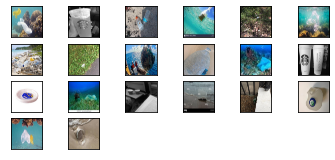

In [ ]:
#Arreglos vacios
img_array = []
titulos_array = []
#Hcemos un for para leer las imagenes de entrenamiento
for x in range(0,20):
    #obtenemos la ruta de las imagenes de entrenamiento/content/yolov5/marine-1/test/images/5d9c9697-18e0-4f8b-9123-67d94ecb9003_png_jpg.rf.1123a41bddaedbc0d85cee2ae3c5d5e6.jpg
    dirArchivo = dirCarpeta +'/'+archivos[x]
   
    #Cargar la imagen con openCV
    imgBGR = cv2.imread(dirArchivo)
    #Cambiar esacio de color BGR a RGB
    imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
    #Arreglo con la informacion de las imagenes leidas
    img_array.append(imgRGB)
    #Extraer el nombre de la imagen sin la extension
    img_ext = archivos[x]
    nomImagen = img_ext[:-4]
    #Nombres de imagenes ser[an un arreglo de titulos
    titulos_array.append(nomImagen)
    #Establecer filas y comulnas de la figura
    plt.subplot(6,6,x+1)
    #Ocultar valores numericos de los ejes
    plt.xticks([])
    plt.yticks([])
    #Identifica que imagen mostrar
    plt.imshow(img_array[x])
#Mostrar imagen
plt.show()

# **Definimos el Modelo**
1.   Definir la configuración y la arquitectura del modelo
2.   Escribiremos un script yaml que defina los parámetros de nuestro modelo, como el número de clases, anclas y cada capa.

Para entrenar el YOLOv5 hay 4 versiones.
*   yolov5-s que es una versión pequeña
*   yolov5-m que es una versión mediana
*   yolov5-l que es una versión grande
*   yolov5-x que es una versión extra grande



In [ ]:
#Definir el número de clases basado en YAML
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
#Esta es la configuración del modelo que usaremos es version pequeña de yolov5 
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [ ]:
#Personalizar el archivo de escritura de iPython para que podamos escribir variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:
#Personalizamos el archivo yaml con la version pequeña
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

# **Entrenamos el modelo**
Para entrenar el modelo tenemos que pasarle una serie de parametros 

*   img: define el tamaño de la imagen de entrada
*   lote: determinar el tamaño del lote
*   épocas: define el número de épocas de entrenamiento. (Nota: ¡a menudo, más de 3000 son comunes aquí!)
*   datos: establezca la ruta a nuestro archivo yaml
*   cfg: especificar la configuración de nuestro modelo
*   pesos: especifique una ruta personalizada a los pesos. (Nota: puede descargar pesos desde la carpeta de Google Drive de Ultralytics)
*   nombre: nombres de resultados
*   nosave: solo guarda el punto de control final
*   caché: imágenes de caché para un entrenamiento más rápido


In [ ]:
%pip install -q wandb
import wandb
wandb.login()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 21.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Currently logged in as: ydieh. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/desechos-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-S

### **Evaluamos el como le fue al entrenamiento**
Para comprender mejor los resultados, resumamos las pérdidas y las métricas de YOLOv5. La función de pérdida de YOLO se compone de tres partes:

1.   box_loss — pérdida de regresión del cuadro delimitador (error cuadrático medio).
2.   obj_loss — la confianza de la presencia del objeto es la pérdida de objetividad 
3. cls_loss — the classification loss (Cross Entropy)

La precisión mide cuánto de las predicciones de bbox son correctas (Verdaderos positivos / (Verdaderos positivos + Falsos positivos)), y Recall mide cuánto de los verdaderos bbox se predijeron correctamente (Verdaderos positivos / (Verdaderos positivos + Falsos negativos)). 'mAP_0.5' es la precisión media media ( mAP ) en el umbral IoU (intersección sobre unión) de 0,5. 'mAP_0.5:0.95' es el promedio de mAP sobre diferentes umbrales de IoU, que van de 0,5 a 0,95.

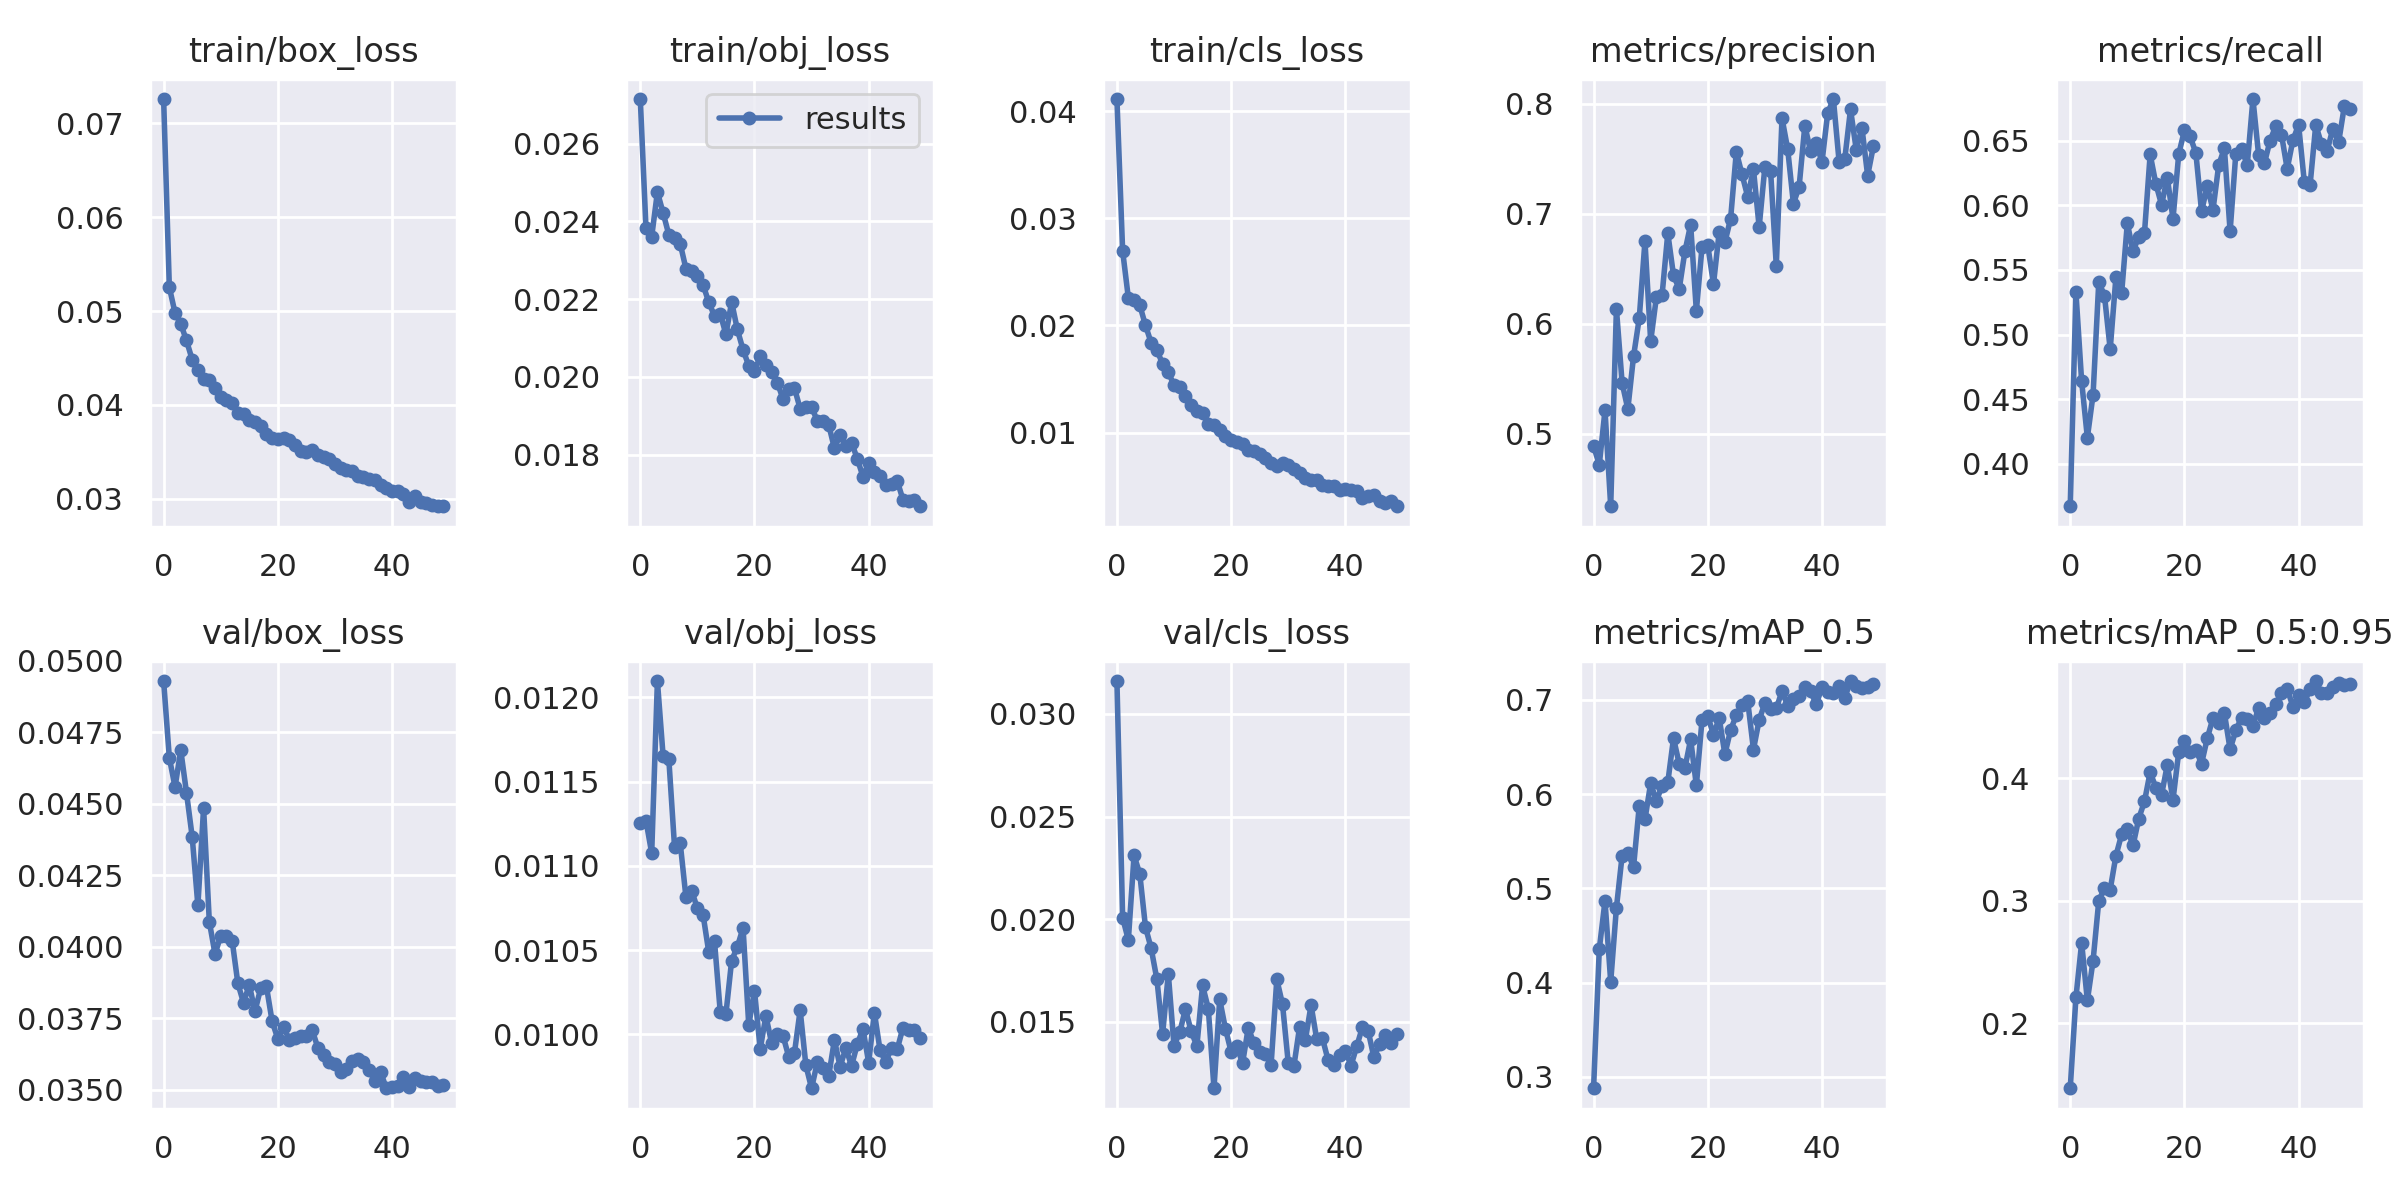

In [ ]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp/results.png', width=1000)  # view results.png

### **Matrix de Confusion**

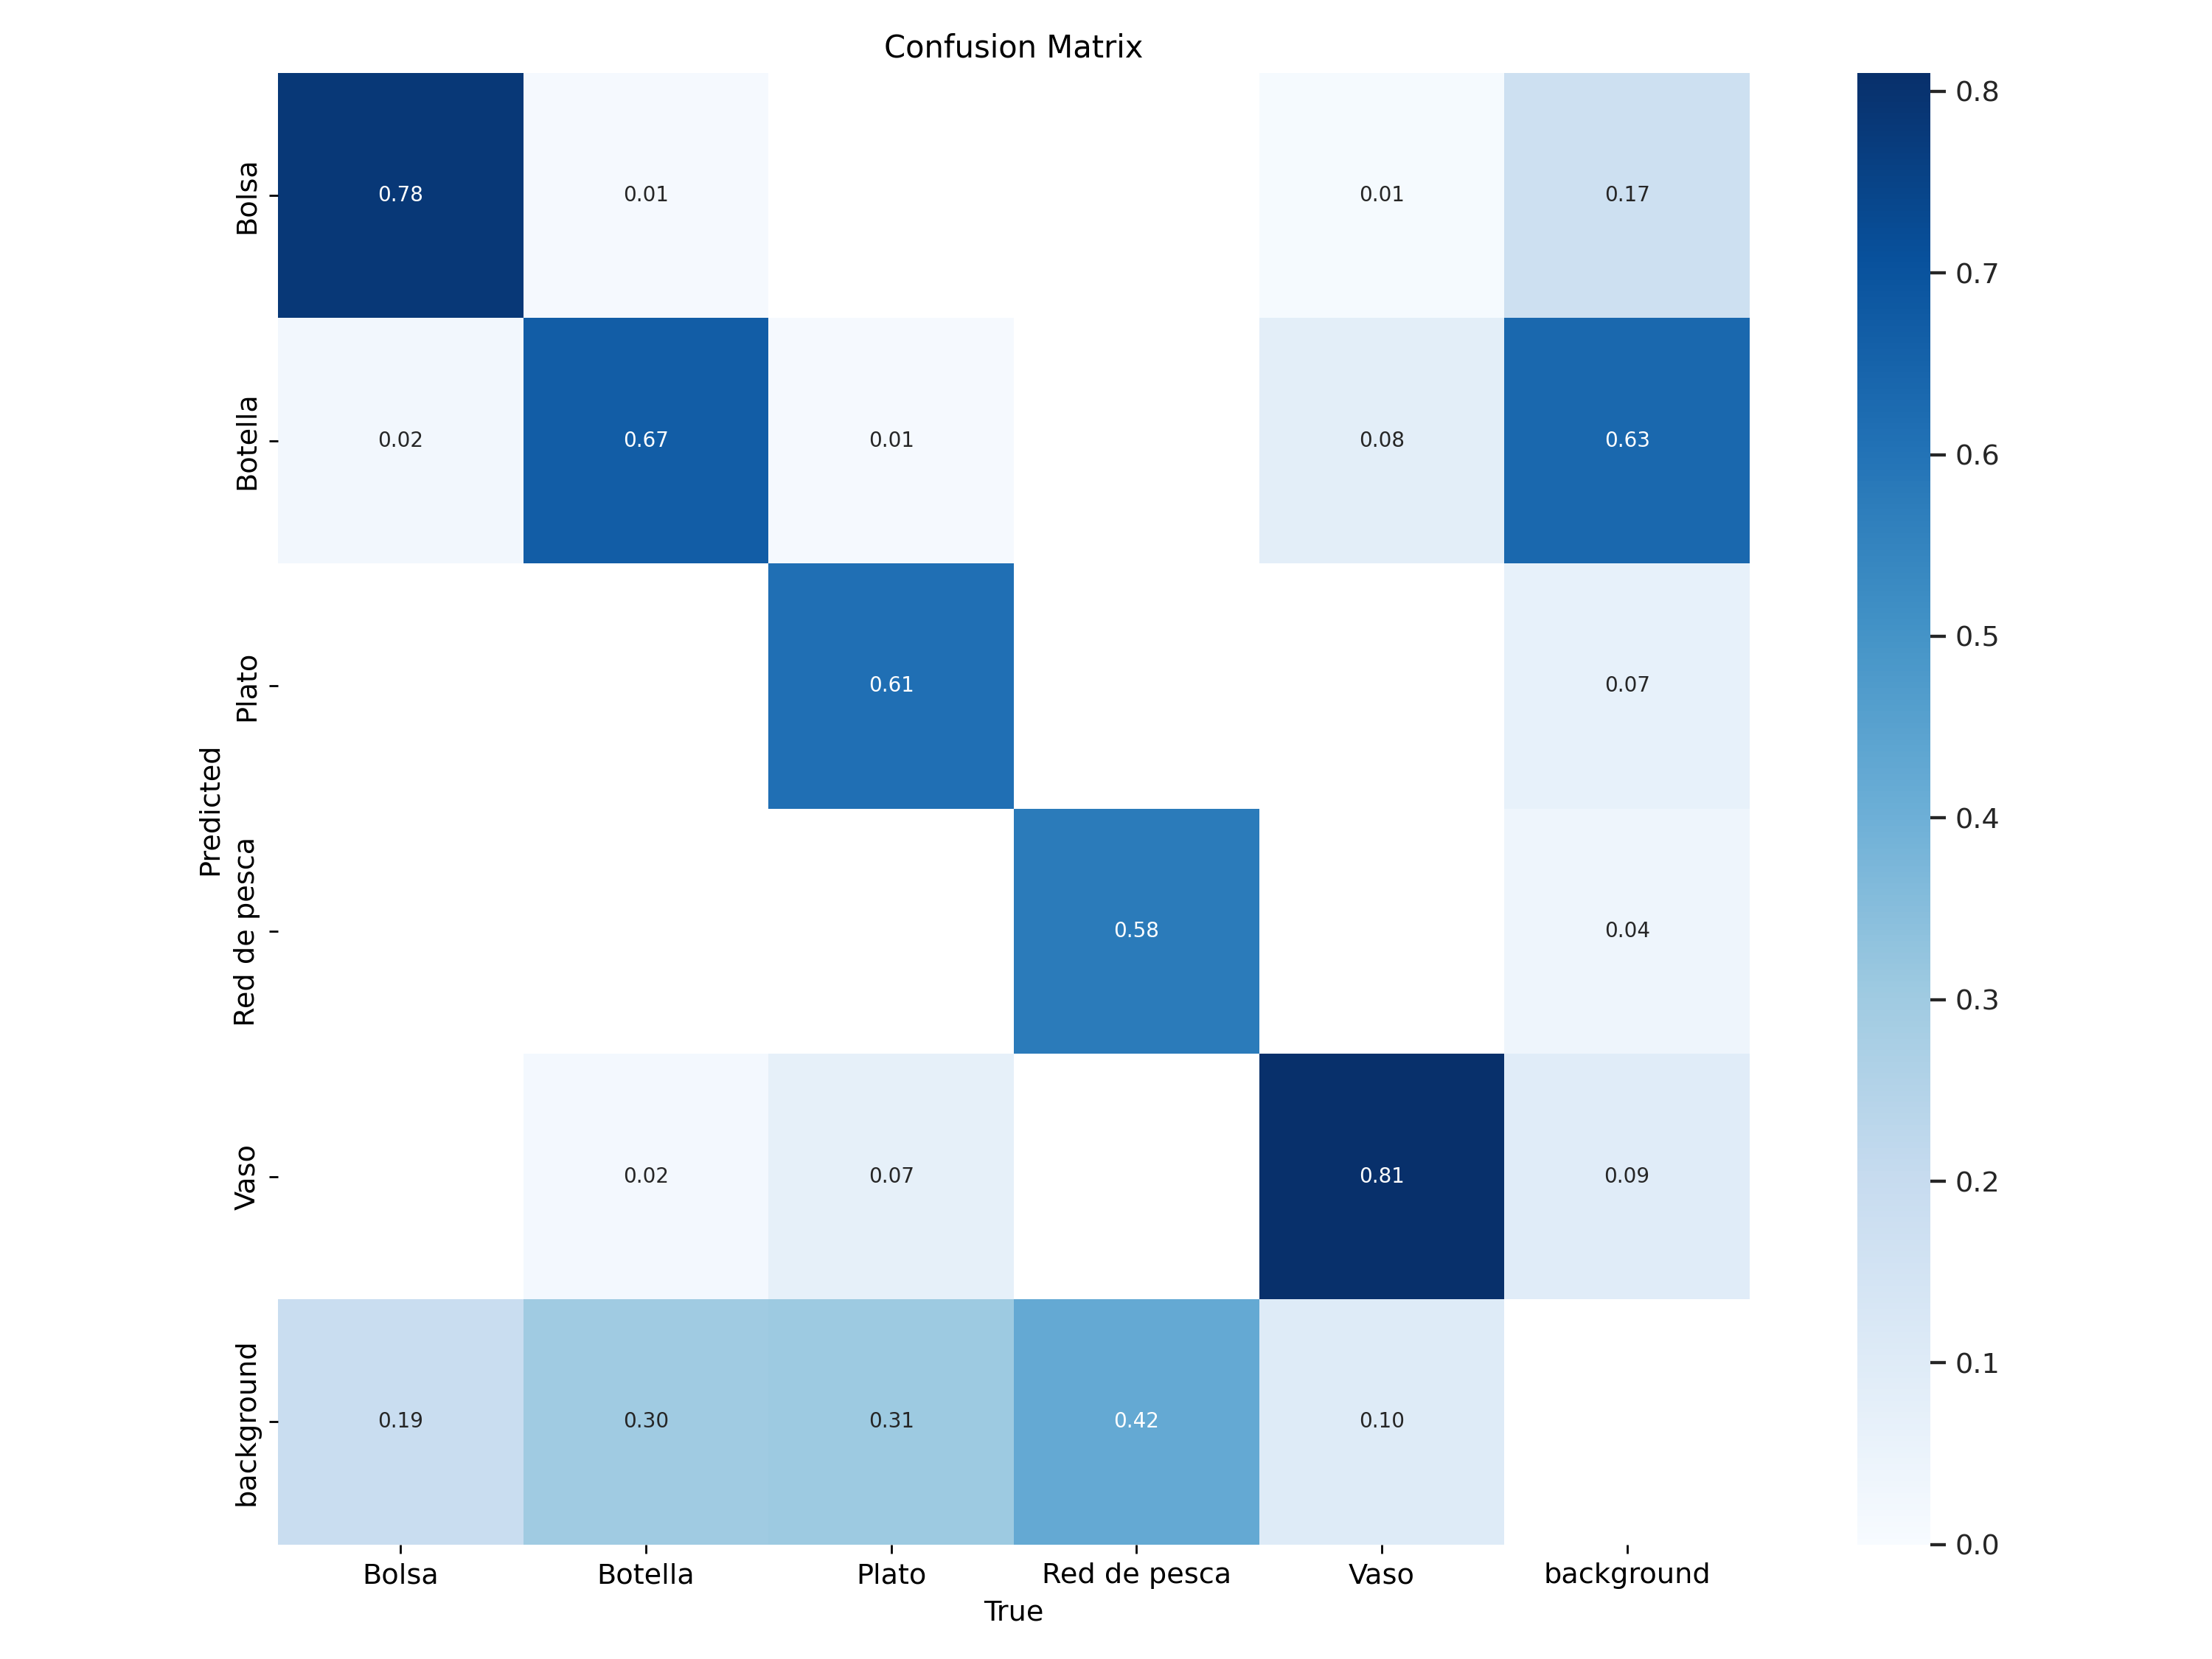

In [ ]:

Image(filename='/content/yolov5/runs/train/exp/confusion_matrix.png', width=900)

### **Curva de Presicion**

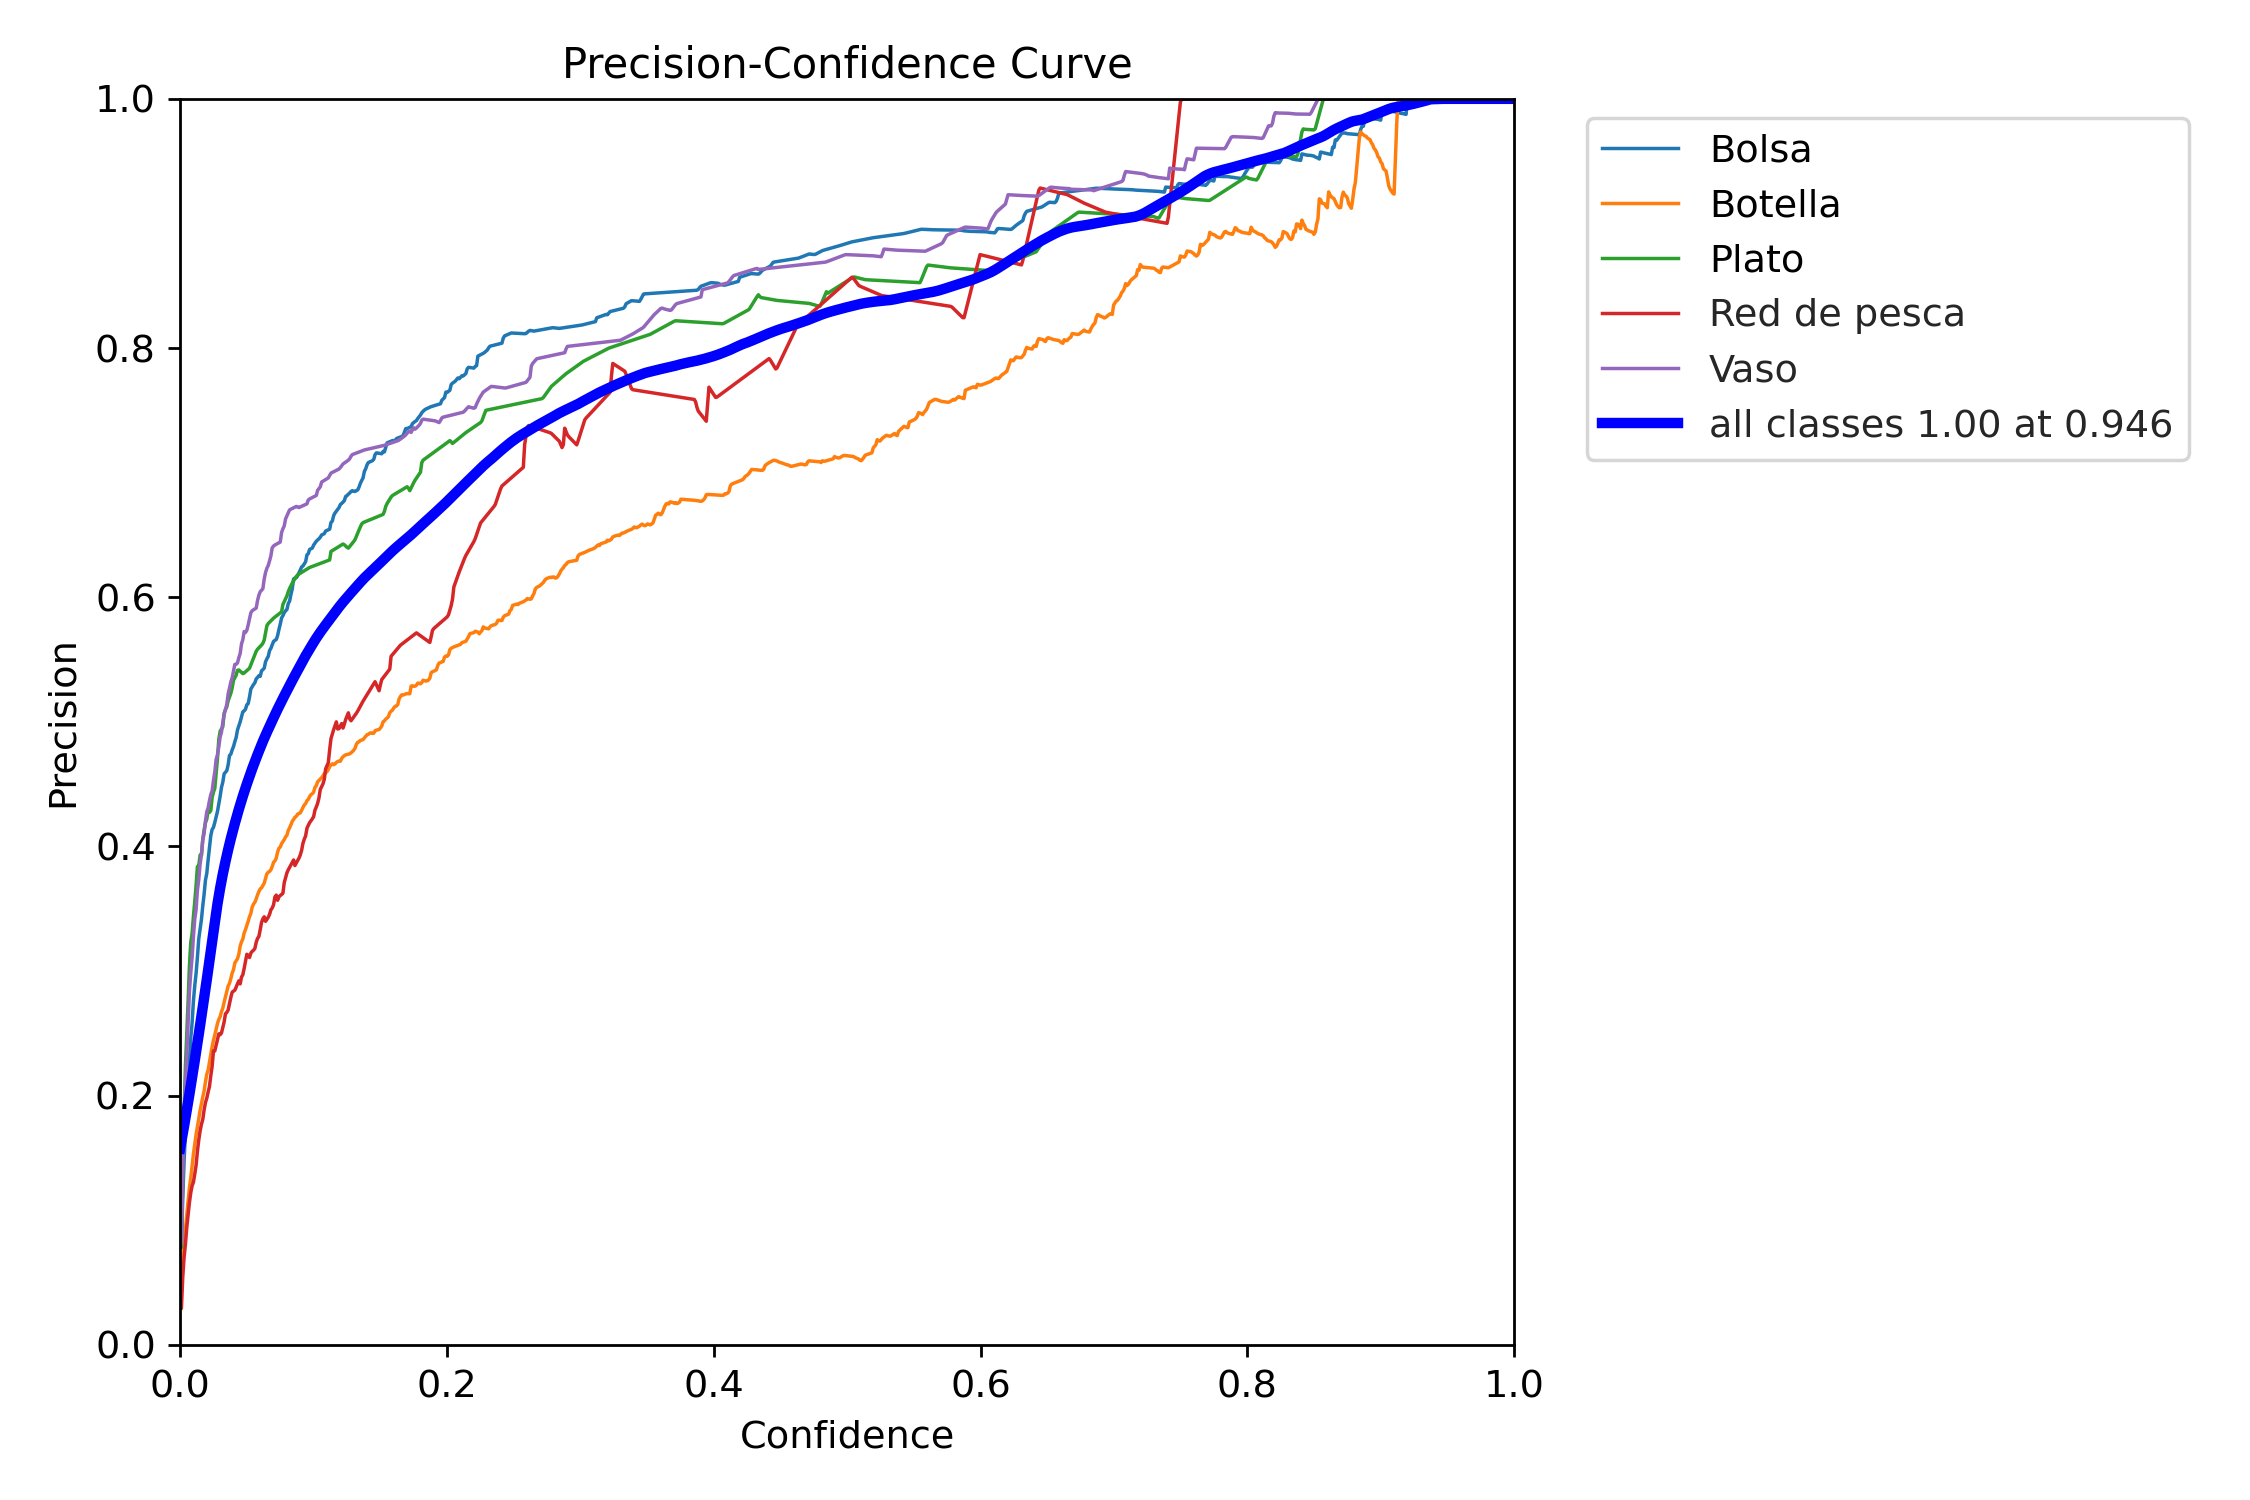

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/P_curve.png', width=900)

### **Curva de Recall**

mide cuánto de los verdaderos bbox se predijeron correctamente (Verdaderos positivos / (Verdaderos positivos + Falsos negativos)).

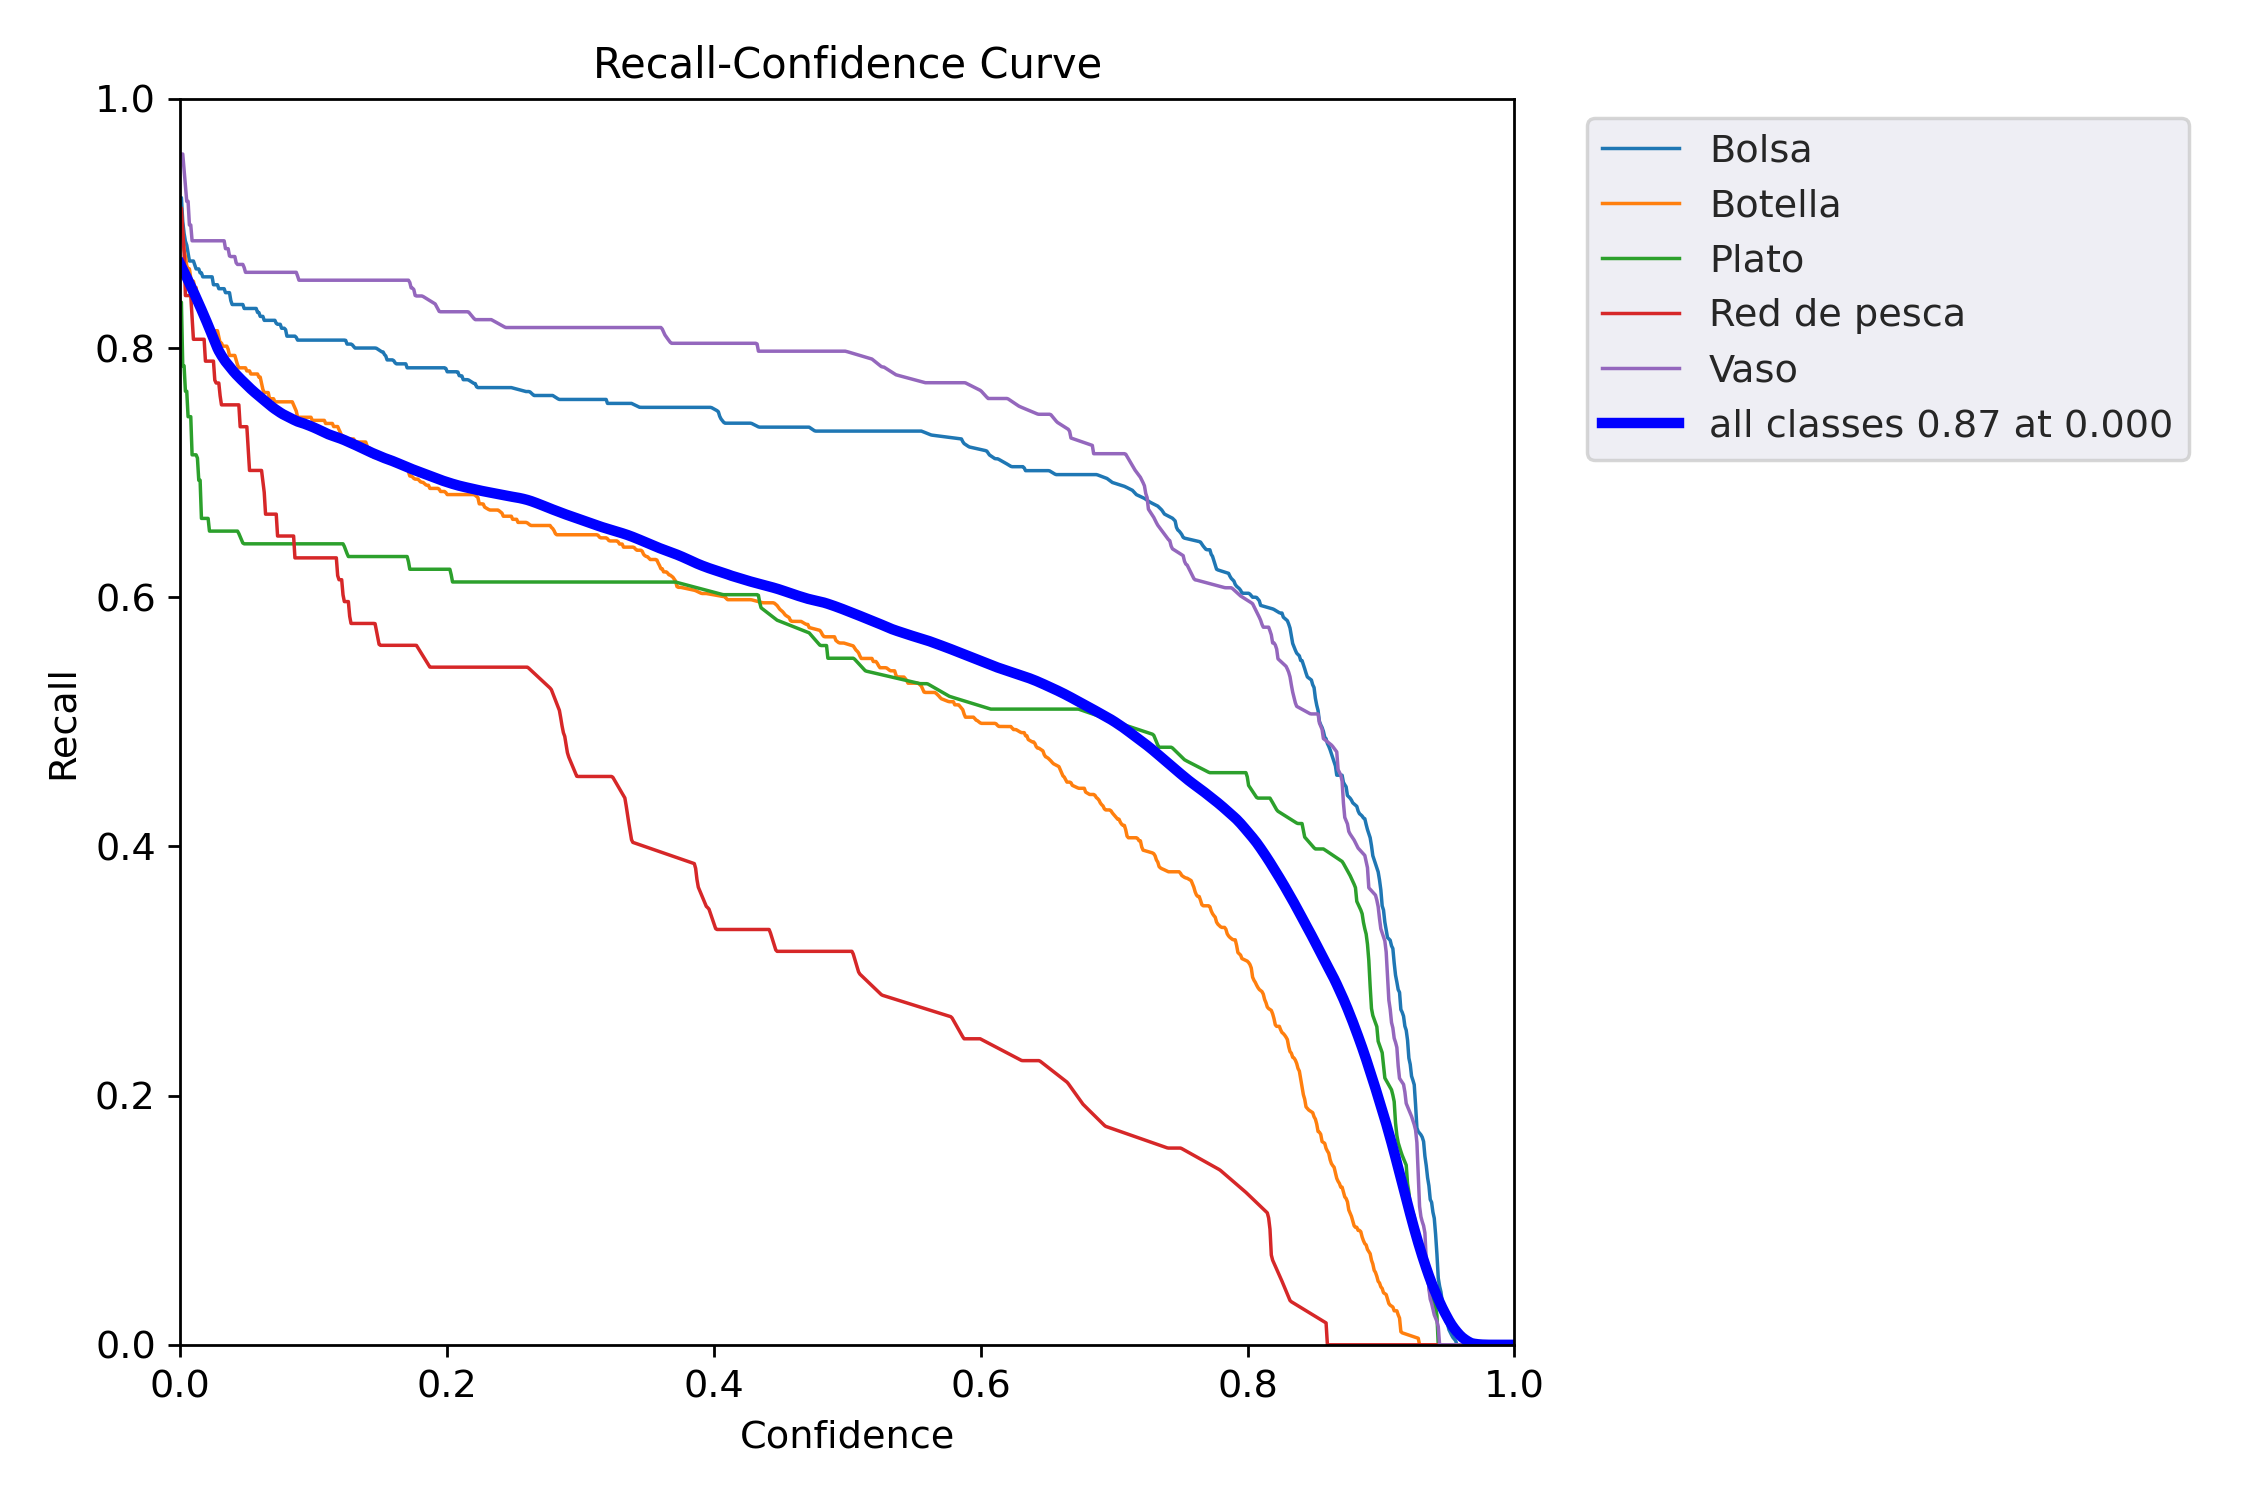

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/R_curve.png', width=900)

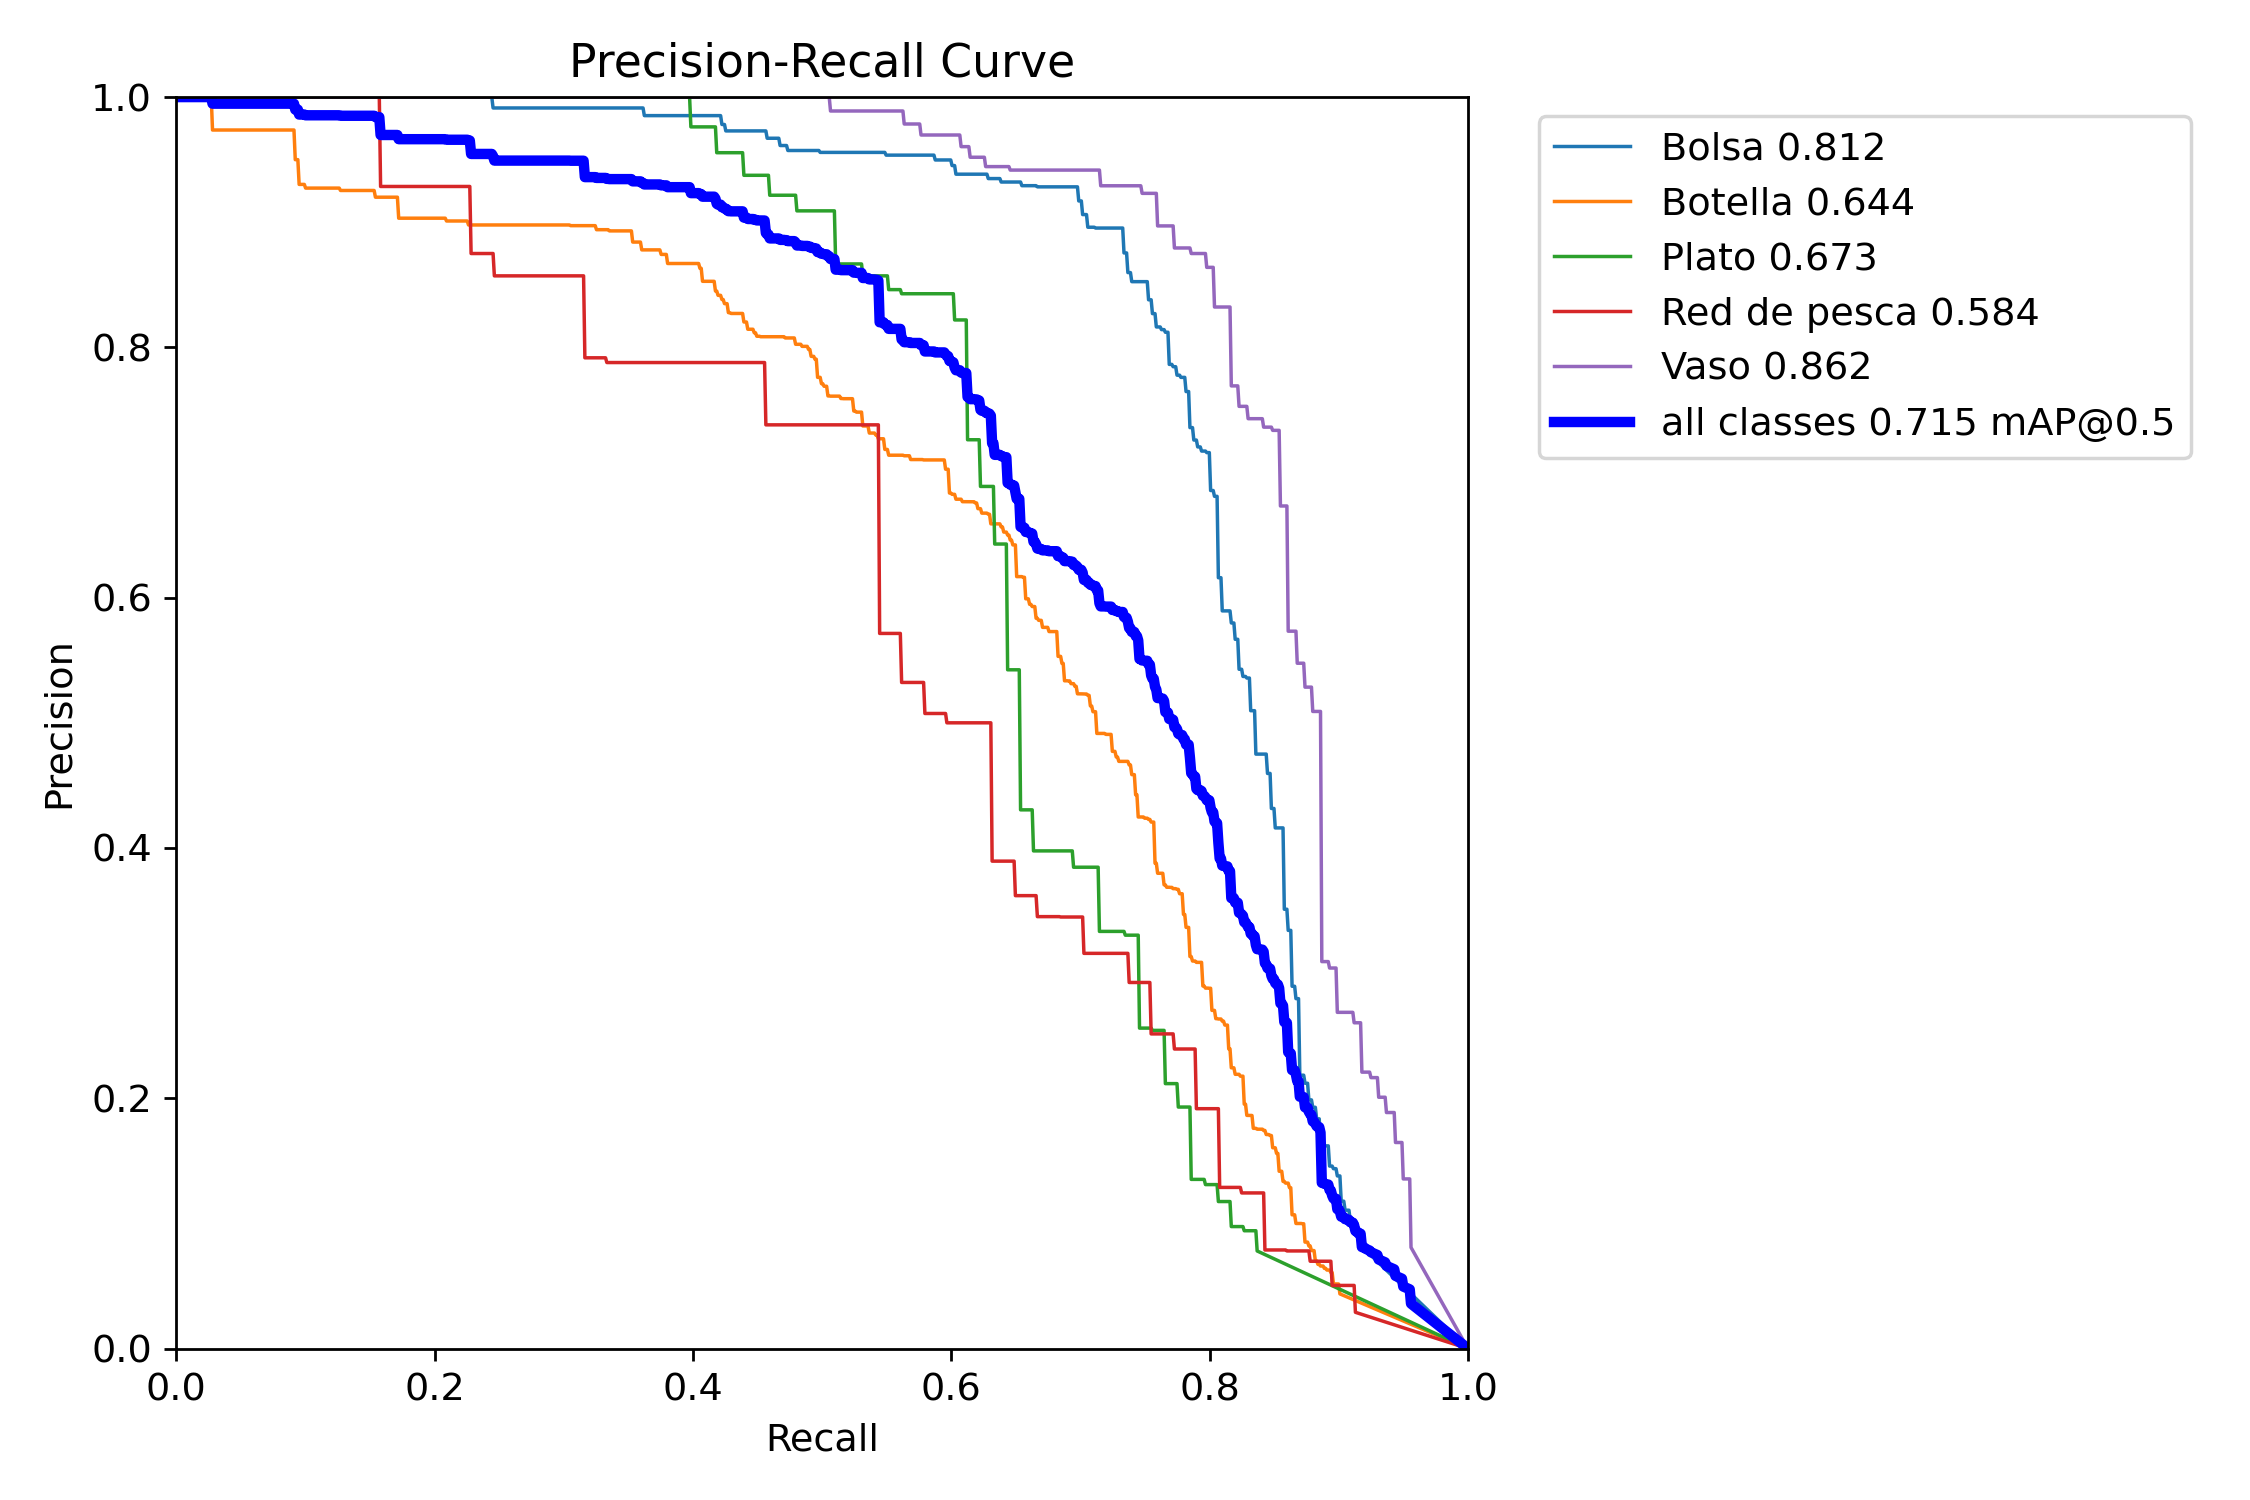

In [ ]:
Image(filename='/content/yolov5/runs/train/exp/PR_curve.png', width=900)

### **Probamos el modelo con los datos de test**

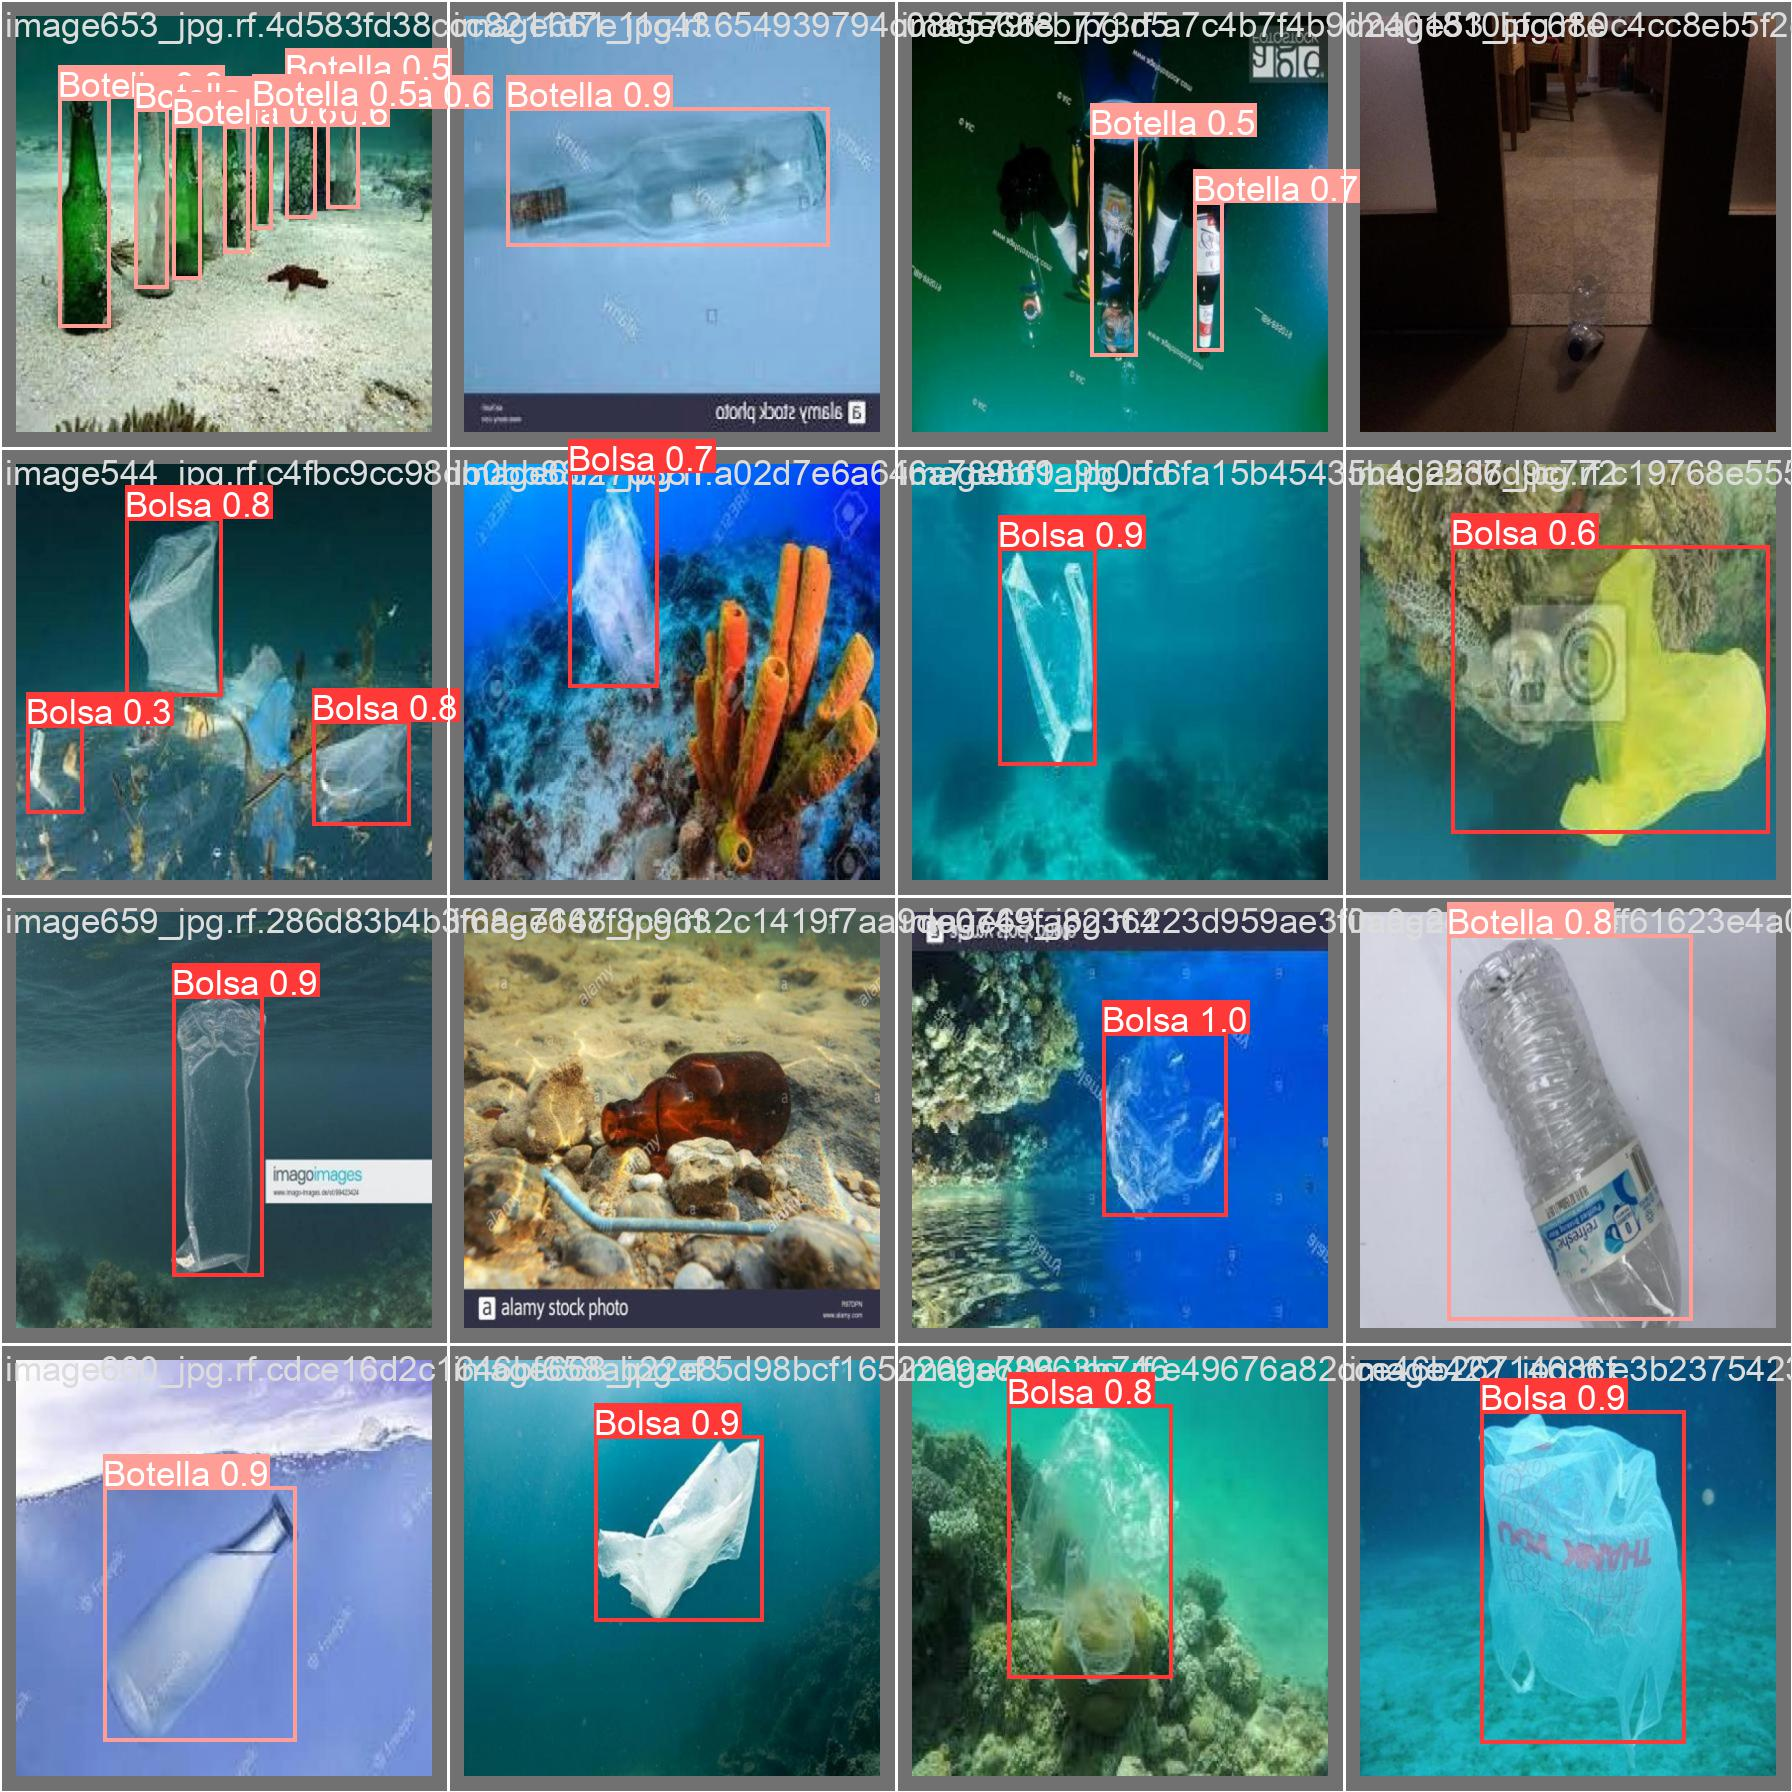

In [ ]:
# Mostramos un ejemplo con datos de entrenamiento
Image(filename='/content/yolov5/runs/train/exp/val_batch2_pred.jpg', width=900)

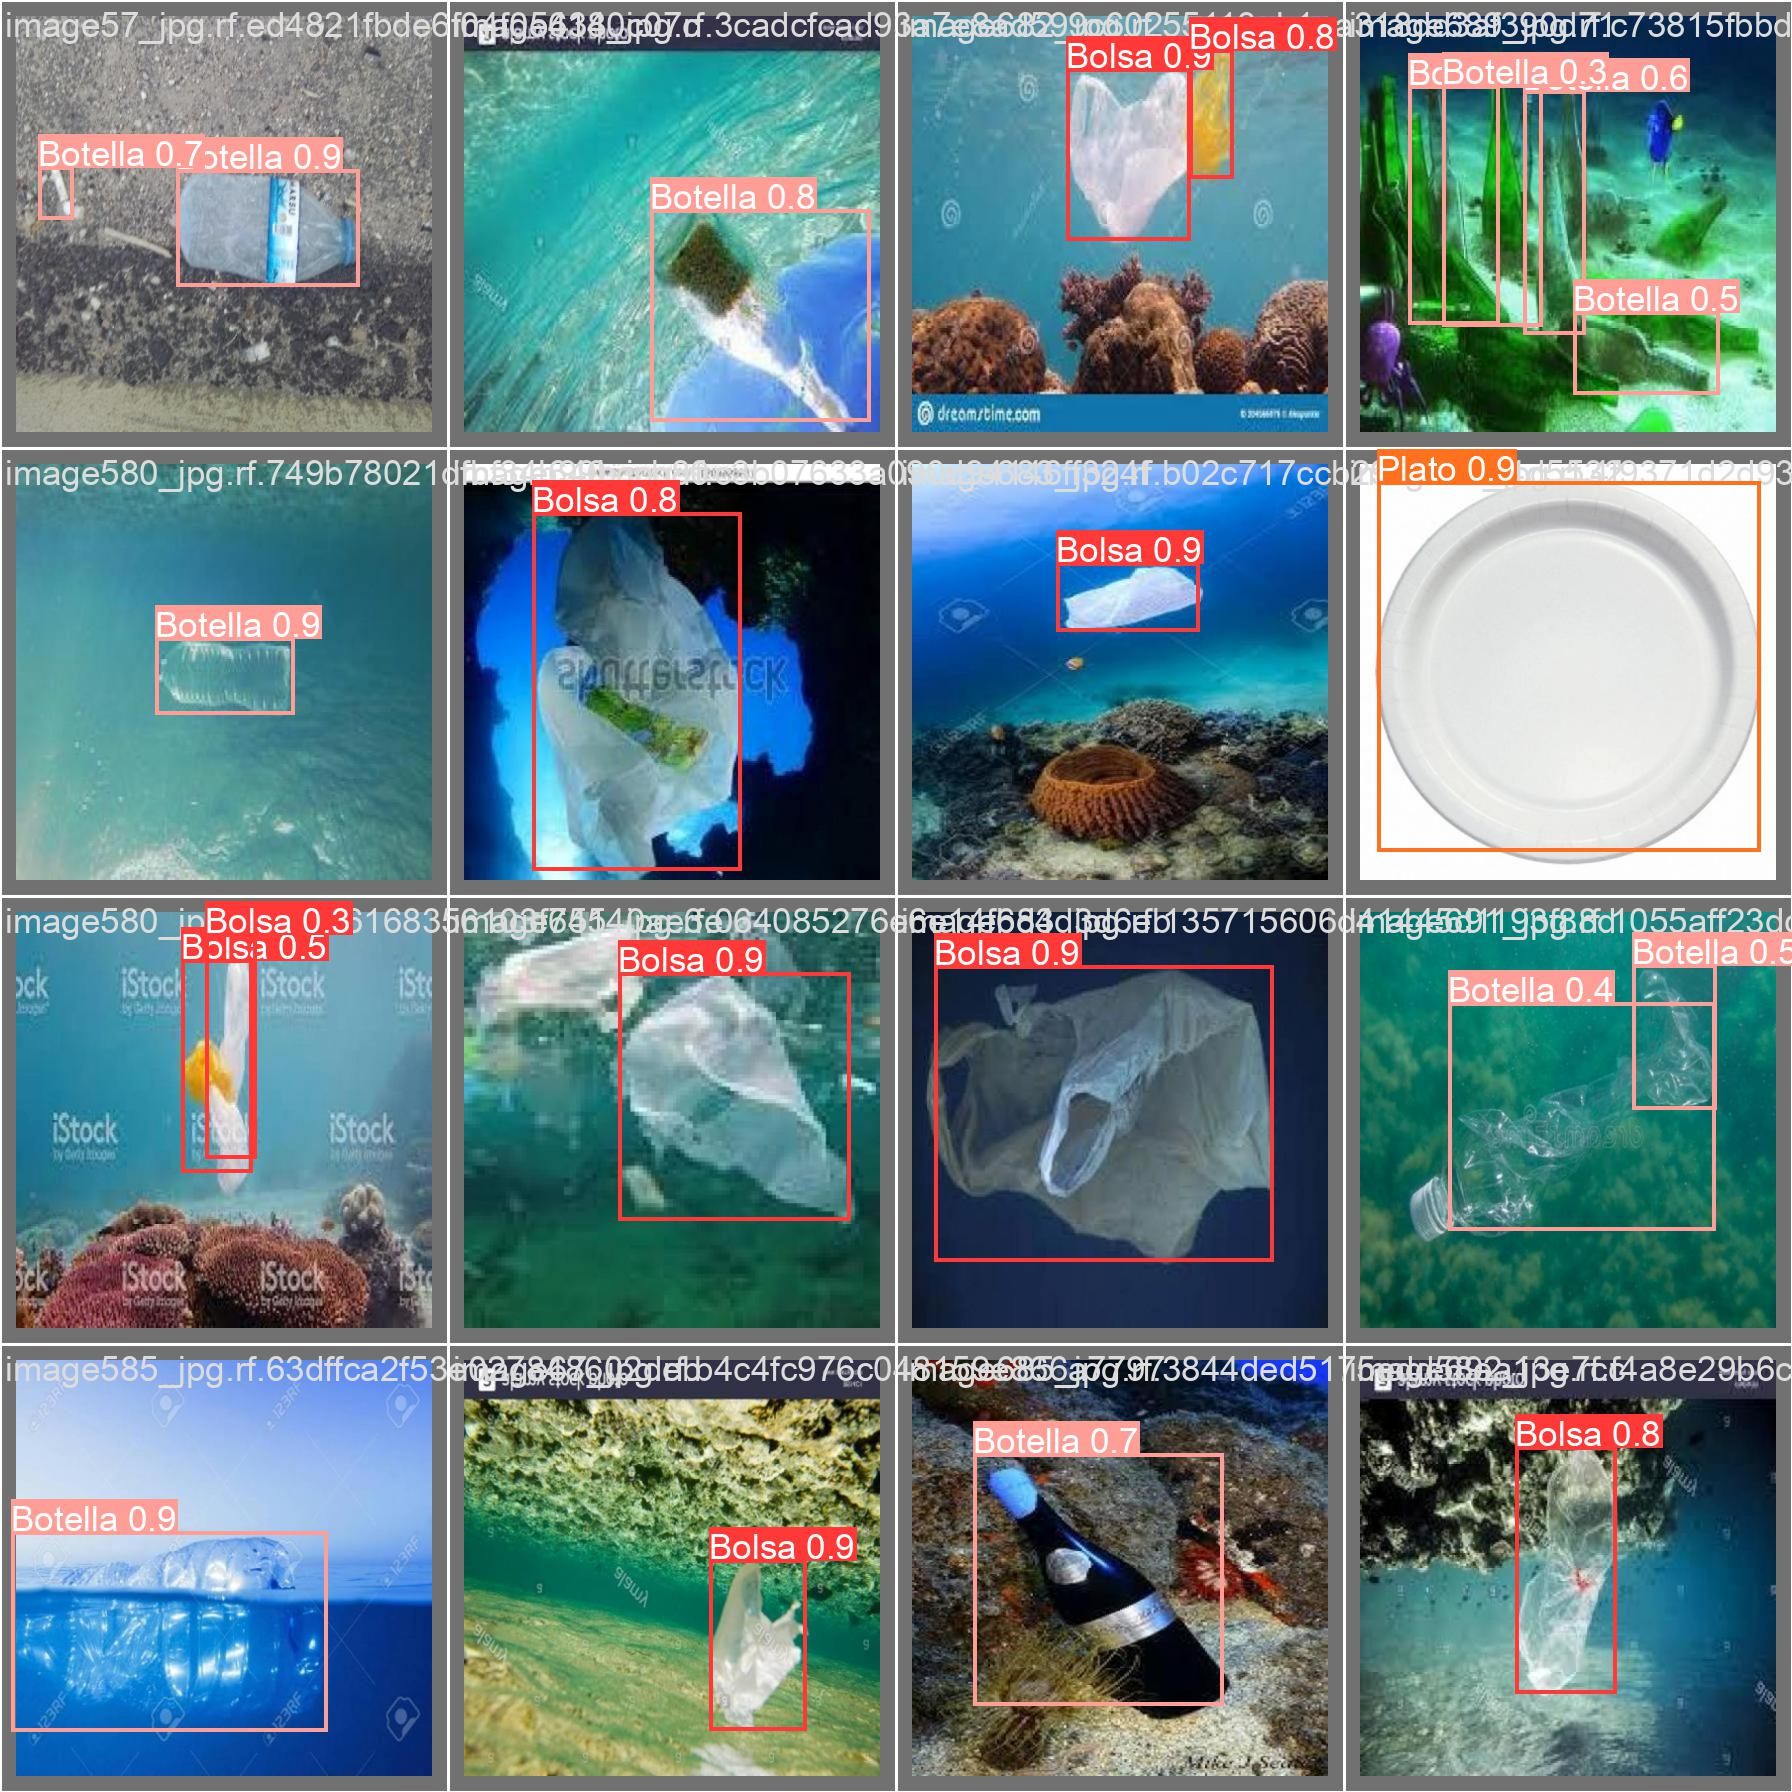

In [ ]:
# Mostramos un ejemplo con la prediccion de la imagen anterior
Image(filename='/content/yolov5/runs/train/exp/val_batch1_pred.jpg', width=900)

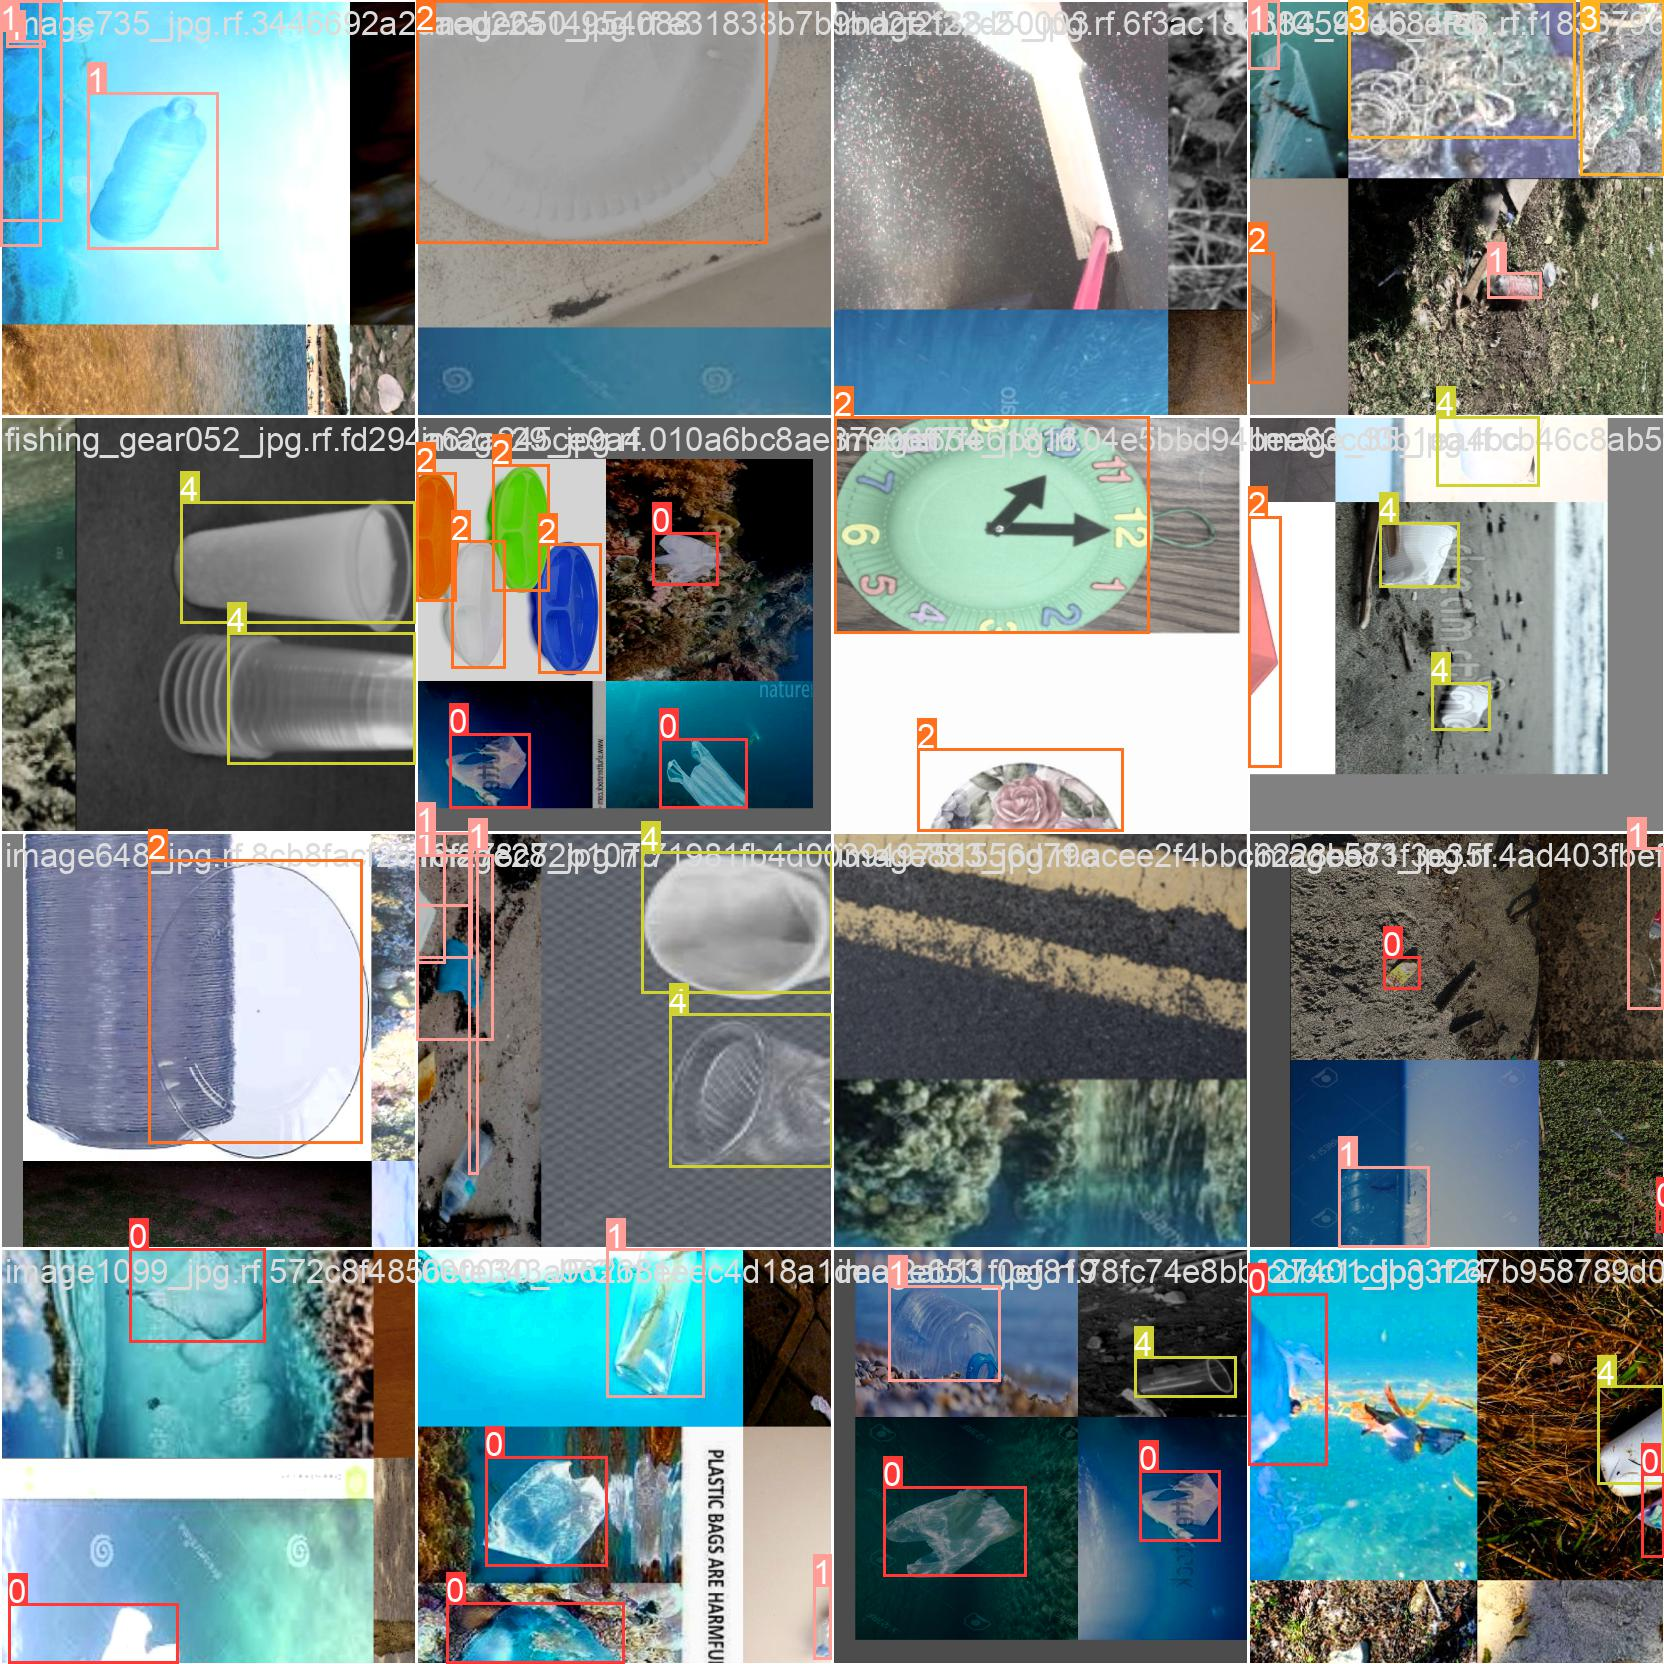

In [ ]:
# Mostramos un ejemplo de entrenamiento con datos de aumentados
Image(filename='/content/yolov5/runs/train/exp/train_batch0.jpg', width=900)

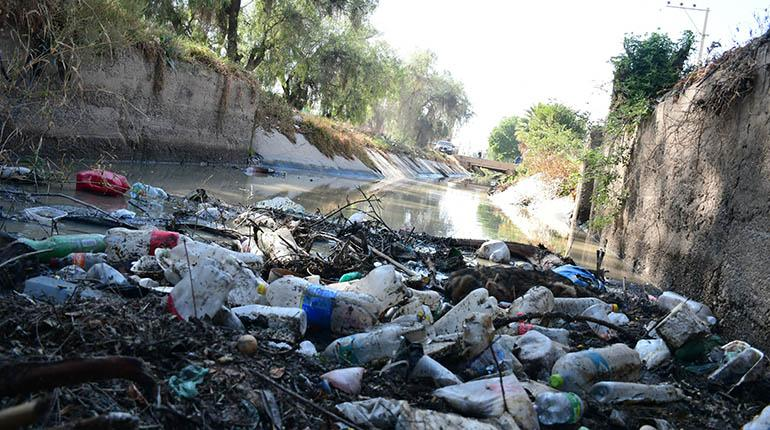

In [ ]:
Image(filename='/content/yolov5/1_me_1_lopezzzzzzzzz.jpg', width=500)

In [ ]:
import cv2
import numpy as np

# Leer la imagen en color
img = cv2.imread('/content/yolov5/Sin título.jpg')

# Convertir la imagen a escala de grises
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [ ]:
!python detect.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --img 416 --conf 0.2 --source '/content/yolov5/1_me_1_lopezzzzzzzzz.jpg'

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolov5/1_me_1_lopezzzzzzzzz.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/1_me_1_lopezzzzzzzzz.jpg: 256x416 1 Bolsa, 16 Botellas, 15.6ms
Speed: 0.3ms pre-process, 15.6ms inference, 1.8ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp3


In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
images = []
for img_path in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,25))
columns = 4
for i, image in enumerate(images):
    plt.subplot((int(len(images) / columns + 1)), columns, i + 1)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.imshow(image)

<Figure size 1440x1800 with 0 Axes>

### Exportacion del modelo a engine, onnx, tensowflow lite

In [ ]:
!python export.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --include torchscript --img 640 --optimize

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=True, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript']
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp/weights/best.pt with output shape (1, 25200, 10) (13.7 MB)

TorchScript: starting export with torch 1.13.1+cu116...
TorchScript: export success ✅ 3.6s, saved as /content/yolov5/runs/train/exp/weights/best.torchscript (27.0 MB)

Export complete (4.4s)
Results saved to /content/yolov5/runs/train/exp/weights
Detect:          python detect.py --weights /content/yolov5/runs/train/exp/weights/best.torchs

In [ ]:
!python export.py --weights '/content/yolov5/runs/train/exp/weights/best.pt' --include tflite  --img 416 

export: data=data/coco128.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/yolov5/runs/train/exp/weights/best.pt with output shape (1, 10647, 10) (13.7 MB)
2023-03-01 11:21:16.261894: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler fla

In [ ]:
!python export.py --weights '/content/yolov5/runs/train/yolov5s_results/weights/best.pt' --include engine onnx --data {dataset.location}/data.yaml --device 0 --imgsz 640 640

export: data=/content/yolov5/desechos-3/data.yaml, weights=['/content/yolov5/runs/train/yolov5s_results/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['engine', 'onnx']
YOLOv5 🚀 v7.0-116-g5c91dae Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "export.py", line 672, in <module>
    main(opt)
  File "export.py", line 667, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.8/dist-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "export.py", line 547, in run
    model = attempt_load(weights, device=device, inplace=True, fuse=True)  # load FP32 model
  File "/content/yolov5/models/experimental.py", line 79, in atte

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.pt /content/gdrive/My\ Drive

In [ ]:
%cp /content/yolov5/runs/train/yolov5s_results/weights/best.tflite /content/gdrive/My\ Drive